In [35]:
# Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from parse import preprocess

In [36]:
df = preprocess("rawfile_blood.csv")


####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1007

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47


In [37]:
# Conduct Random Forest to do feature selection

# Specify features and labels
y = df['condition']
x = df.drop(['mtag', 'condition'], axis=1)

# Display features and labels
print(x, y)

# Display shape of features and labels
print("\nShape of Features:")
print(x.shape)
print("\nShape of Labels:")
print(y.shape)

# Data Dictionary:
# frail -> 0
# frail_mci -> 1
# mci -> 2
# prefrail_mci -> 3
# prefrail -> 4
# robust -> 5

# Conduct label mapping for conditions
label_mapping = {
    'frail' : 0,
    'frail_mci' : 1,
    'mci' : 2,
    'prefrail_mci' : 3,
    'prefrail' : 4,
    'robust' : 5
}

y = y.map(label_mapping)

# Display label
print(y)

# Create Random Forest Classifier Model
model = RandomForestClassifier(random_state=1)

# Build the model
model.fit(x, y)

      A1_1  A2_1  A3_1  B1_a  B1_a1  B1_a2  B1_a3  B1_a4  B1_a5  B1_a6  ...  \
0      196    24  46.5   121   3.93   0.37     95     31    324   13.3  ...   
1      200    23  55.6   142   4.82   0.42     87     30    346   12.8  ...   
2      441    20  76.8   105   4.54   0.41     90     30    330   14.0  ...   
3      265    16  47.2   122   4.53   0.39     86     27    313   14.9  ...   
4      425    14  31.3   124   4.44   0.38     85     28    329   12.6  ...   
...    ...   ...   ...   ...    ...    ...    ...    ...    ...    ...  ...   
1002   220    19  67.5   138   4.66   0.42     91     30    325   14.1  ...   
1003   334    18  51.0   139   4.63   0.42     91     30    330   15.6  ...   
1004   418    17  61.0   122   4.18   0.38     90     29    324   13.5  ...   
1005   393    18  43.1   136   4.57   0.43     94     30    316   12.5  ...   
1006   371    24  55.9   127   4.41   0.40     90     29    320   13.8  ...   

      B2_d6  B2_d7  B2_d8  B2_d9   B3  B4_a2  B4_a5

RandomForestClassifier(random_state=1)

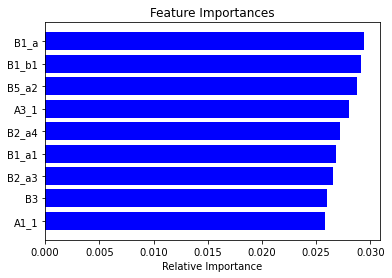

In [38]:
features = x.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Check if less than 50% for cummulative importance

# Check Normality of data

In [39]:
# Allow model to identify which features are most important
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

sel.fit(x, y)
selected_feat= x.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

Index(['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a6', 'B1_b', 'B1_b1',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b2',
       'B2_c1', 'B2_c2', 'B2_c4', 'B2_c7', 'B2_d5', 'B2_d7', 'B2_d9', 'B3',
       'B5_a2', 'B5_a3'],
      dtype='object')
26


In [40]:
# Implement classification with these models
df = preprocess("rawfile_blood.csv")

df_new = df[selected_feat]
df_new['mtag'] = df['mtag'].values
df_new['condition'] = df['condition'].values

df = df_new

print(df)


####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1007

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47
      A1_1  A2_1  A3_1  B1_a  B1_a1  B1_a6  B1_b  B1_b1   B1_c  B1_d  ...  \
0      196    24  46.5   121   3.93   13.3   5.6    2.9  255.0   5.0  ...   
1      200    23  55.6   142   4.82   12.8  10.0    5.1 

<ipython-input-40-ccd84321172f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mtag'] = df['mtag'].values
<ipython-input-40-ccd84321172f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['condition'] = df['condition'].values


In [41]:
#==================================================
# RUN SVM LINEAR CLASSIFICATION (WITH 6 FEATURES) //
#==================================================

# Specify features and labels
y = df['condition']
x = df.drop(['mtag', 'condition'], axis=1)

# Display features and labels
print(x, y)

# Display shape of features and labels
print("\nShape of Features:")
print(x.shape)
print("\nShape of Labels:")
print(y.shape)

# Data Dictionary:
# frail -> 0
# frail_mci -> 1
# mci -> 2
# prefrail_mci -> 3
# prefrail -> 4
# robust -> 5

# Conduct label mapping for conditions
label_mapping = {
    'frail' : 0,
    'frail_mci' : 1,
    'mci' : 2,
    'prefrail_mci' : 3,
    'prefrail' : 4,
    'robust' : 5
}

y = y.map(label_mapping)
y = np.array(y)

# Display label
print(y)

# Display shape of label
print(y.shape)

# Conduct train-test split on dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Display x_train, x_test, y_train, y_test
print("\nX Train:")
print(x_train)
print("\nX Test:")
print(x_test)
print("\nY Train:")
print(y_train)
print("\nY Test:")
print(y_test)

# Display shape of train and test sets
print("\nShape of X Train:")
print(x_train.shape)
print("\nShape of X Test:")
print(x_test.shape)
print("\nShape of Y Train:")
print(y_train.shape)
print("\nShape of Y Test:")
print(y_test.shape)

# Create linear SVM model
model = svm.SVC(kernel='linear')

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Measure accuracy
acc = accuracy_score(y_test, predictions)

# Print predictions, actual, and accuracy score
print("Predictions:", predictions)
print("Actual:", y_test)
print("Accuracy:", acc)

      A1_1  A2_1  A3_1  B1_a  B1_a1  B1_a6  B1_b  B1_b1   B1_c  B1_d  ...  \
0      196    24  46.5   121   3.93   13.3   5.6    2.9  255.0   5.0  ...   
1      200    23  55.6   142   4.82   12.8  10.0    5.1  219.0   4.7  ...   
2      441    20  76.8   105   4.54   14.0   8.4    3.2  225.0   4.6  ...   
3      265    16  47.2   122   4.53   14.9   7.7    4.9  312.0   6.2  ...   
4      425    14  31.3   124   4.44   12.6   6.6    2.6  295.0   9.7  ...   
...    ...   ...   ...   ...    ...    ...   ...    ...    ...   ...  ...   
1002   220    19  67.5   138   4.66   14.1   6.3    3.2  291.0   6.1  ...   
1003   334    18  51.0   139   4.63   15.6   5.3    2.5  235.0   4.5  ...   
1004   418    17  61.0   122   4.18   13.5   4.3    2.1  191.0   5.3  ...   
1005   393    18  43.1   136   4.57   12.5   5.5    2.9  298.0   4.8  ...   
1006   371    24  55.9   127   4.41   13.8   5.5    3.1  301.0   5.4  ...   

      B2_c1  B2_c2  B2_c4  B2_c7  B2_d5  B2_d7  B2_d9   B3  B5_a2  B5_a3  
